### Here XRD data are visualized and analyzed 

In [1]:

from functions import *

sample = "mittma_00019_R_slow"
#path to the Data / Sample folder
folder = r"Z:\P110143-phosphosulfides-Andrea\Data\Samples\mittma_0019_Cu\XRD" 

#### Raw data treatment

In [ ]:
#grid = measurement_grid(5,5,34,34,-17,3) # BR_map 3mm margin
#grid = measurement_grid(5,5,34,34,-17,-37) # FR_map 3mm margin
grid = measurement_grid(5,9,40,80,-20,-40) #  2 slow scans ( 2 center points)

filename = "mittma_0019_R_slowscans.txt" 
#filename = "mittma_0017_GIXRD_5points.txt"
filename = os.path.join(folder, filename)


initial_data, coords = read_XRD(filename, grid, n = 0, separator = "\t")
plot_grid(coords,grid)

Raw data visualization and selection or translation

In [ ]:
datatype_y= 'Intensity, cps'
datatype_x='2θ (°)'
plot_data(initial_data, datatype_x, datatype_y ,x=0 , y=20 , plotscale = 'log')

In [ ]:
# if you want to work only on a limited number of points 
which =initial_data.keys()[0:8]
data= initial_data[which]
display(data)

In [ ]:
# translate data if needed
data, coords = translate_data(initial_data, x=0, y=-20)
MI_to_grid(data) #prints new coordinates

Remove the background and save processed data for future use

In [ ]:
#  preliminary finidng peaks 
data= initial_data.copy() # un-comment if you want to work on original data
dataRangeMin = 0
dataRangeMax = len(data)
filterstrength = 15 # higher number = more noise is removed by the filter
peakprominence = 50 # higher number = only peaks with prominence above this value are considered
peakwidth = 15
 # higher number = wider peaks are considered

peaks, dataCorrected = initial_peaks(data, dataRangeMin, dataRangeMax, filterstrength,
                                         peakprominence, peakwidth,
                                         withplots = True, plotscale = 'linear')

In [ ]:
#  remove the background 
data_out = XRD_background(data,peaks, cut_range=1, order=4, withplots= True, Si_cut=True)

In [15]:
#  save clean data for future use 

name = sample + "_clean.pkl"

with (open(os.path.join(folder, name), "wb")) as openfile:
    pickle.dump(data_out, openfile)

In [ ]:
#  plot all points shifted

### Analysis section

In [4]:
#  load clean data, if previously processed  

name = sample + "_clean.pkl"
with open(os.path.join(folder, name), "rb") as openfile:
    data_out = pickle.load(openfile) 

#  load refence spectra

ref_path = r"Z:\P110143-phosphosulfides-Andrea\Data\Analysis\guidal\XRD\ref_database\reflections"

with open(os.path.join(ref_path, "reflections.pkl"), 'rb') as f:
    ref_peaks_df = pickle.load(f)

display(ref_peaks_df["Cu7S4"])

,Peak 2theta,Peak intensity,2theta,I
0,46.366366,2663.416020,20.00000,4.914470e-03
1,26.606607,1262.160376,20.06006,4.944681e-04
2,35.315315,1250.454561,20.12012,3.468491e-05
3,27.807808,954.075398,20.18018,1.696226e-06
4,41.681682,951.760624,20.24024,5.783195e-08
...,...,...,...,...
995,NaN,NaN,79.75976,1.840495e+01
996,NaN,NaN,79.81982,2.360568e+01
997,NaN,NaN,79.87988,3.334922e+01
998,NaN,NaN,79.93994,3.629028e+01


#### Interactive plot to find possible phases

In [14]:
#  define coordinates you want to plot

x = [-17, -8.5, 0, 8.5, 17,
-17, -8.5, 0, 8.5, 17,
-17, -8.5, 0, 8.5, 17,
-17, -8.5, 0, 8.5, 17,
-17, -8.5, 0, 8.5, 17]

y = [-17] * 5 + [-8.5] * 5 + [0] * 5 + [8.5] * 5 + [17] * 5

In [17]:

# plot_XRD_shift_plotly(data, datatype_x, datatype_y, shift, x, y, ref_peaks_df, ref_label="Reference", title=None)
fig= interactive_XRD_shift(data_out, '2θ (°)', 'Corrected Intensity', 400, [0, 0], [20,-20], ref_peaks_df, title="XRD Spectra")
fig.show()

In [24]:
# save interactive plot fo future use

savepath= r"Z:\P110143-phosphosulfides-Andrea\Data\Analysis\guidal\XRD\mittma_0019" # change to your path
savepath = os.path.join(savepath, sample+"_interactive")
#fig.write_image(savepath+".png", scale=2) #scale sets the resolution here
        
fig.write_html(savepath+".html")

#### Fit specific peaks 

In [ ]:
# define peak position to analyze, and fit the peak with two pseudovoigts (ka1, ka2)
peak_position = 27.75
df_first_peak = fit_this_peak(data_out, peak_position, 1, withplots = True, printinfo = False)

In [ ]:
#  plot info from peak fitting in a heatmap

list_to_plot = ["Center", "Amplitude", "FWHM", "Fraction"]
plots_path = r"Z:\P110143-phosphosulfides-Andrea\Data\Analysis\guidal\XRD\mittma_0019" # change to your path
for item in list_to_plot:
    savepath = os.path.join(plots_path, f'{sample}_{peak_position}_{item}.png')
  
    new_heatmap(item, data= df_first_peak, title =  sample + f' peak at 2θ= {peak_position}° - ' + item, 
                savepath = savepath
                )

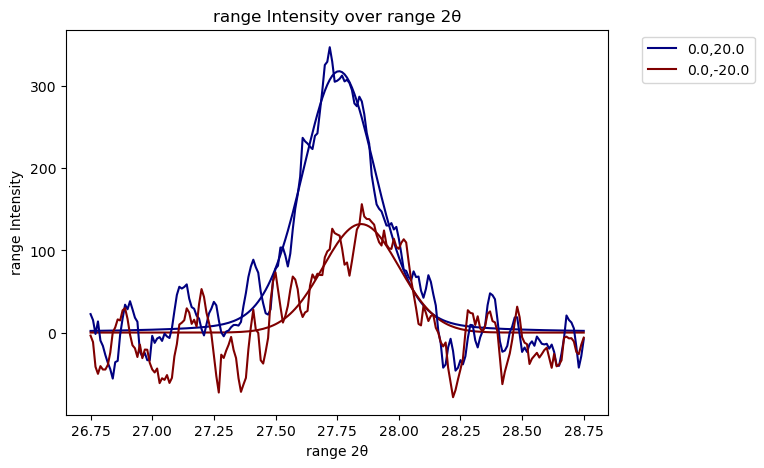

In [28]:
# if you want to look at specific point in the dataset you can call them with plot_data
plt.figure(figsize=(7, 5))
x=[0,0]
y=[20,-20]

plot_data(df_first_peak, 'range 2θ', 'Fit', x,y, plotscale = 'linear')
plot_data(df_first_peak, 'range 2θ', 'range Intensity',x,y, legend =False, scatter_plot=False,  plotscale = 'linear' )
#plt.savefig(os.path.join(plots_path, "mittma_00015_FR_second_peak_weid points.png"))

In [ ]:
# ------------------- calculate shift from reference -------------------

ref_peak_pos = 27.807808

data= df_first_peak.copy()
dat_center = data.iloc[:,data.columns.get_level_values(1)=='Center']
dat_center = dat_center.dropna()
shift = dat_center.values - ref_peak_pos

data = math_on_columns(data, 'Center', type2= ref_peak_pos, operation = "-")
data.rename(columns={'Center - 28.228228':'Center - Reference'}, inplace = True)